In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import scipy as sp
import numpy as np
from scipy import *
from decimal import Decimal
import numpy as np #imports numpy
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D     
import seaborn as sns # provides a high-level interface to draw statitistical graphics
from pylab import *
%config InlineBackend.figure_format = 'retina' #makes images clearer
%matplotlib inline 
#^put plots in line?
from scipy.constants import parsec as pc


## Scaling

In [63]:
med_SFE04000_40 = np.median(StelFluxEarth04000_40)
SFE04000_40 = StelFluxEarth04000_40/med_SFE04000_40
print(med_SFE04000_40)

6.435394924395004e-16


## Trim noisy section

### Reference Indices

In [223]:
wave[1108332] # = 15000.00
wave[1108450] # = 15003.54
wave[1125400] # = 15512.04
wave[1145400] # = 16112.04
wave[1160400] # = 16562.04
wave[1174999] # = 17000.01
wave[1175400] # = 17012.04
print("done")

done


### Trimming

In [220]:

trimA = 1108332
trimB = 1174999
trimWave = wave[trimA:trimB]
#print(trimWave)
#print(wave)


73.87923116811099


## DOPPLER SHIFT

### WAVEobs = WAVEstar * SQRT[(1+v/c)/(1-v/c)] 

In [224]:
# Important Values and Equations

#### Conversions

In [236]:
# speed of light
c = 299792458.0 # meters/sec
c_m = c # meters/sec
c_cm = c*1e2 #centimeters/sec
c_km = c*1e-3 #kilometers/sec

In [234]:
# Speeds in terms of c
print(c)

299792458.0


##### speed of stars ~10 -> 40 km/s

In [235]:
# 1 km/s = 10^5 cm/s

# 1 km/s => c
km_to_c = 1/299792
print(km_to_c)

3.3356460479265623e-06


In [237]:
# speed of the star in km/s
v1 = 30
v2 = 20 
# speed of the star in terms of c
v1 = .0001*c #cm/s [redshift]
v2 = -.0001*c #cm/s [blueshift]
# doppler shift (with c in kilometers)
wave_obsR = wave*(sqrt((1+v1/c)/(1-v1/c))) # [redshift]
wave_obsB = wave*(sqrt((1+v2/c)/(1-v2/c))) # [blueshift]

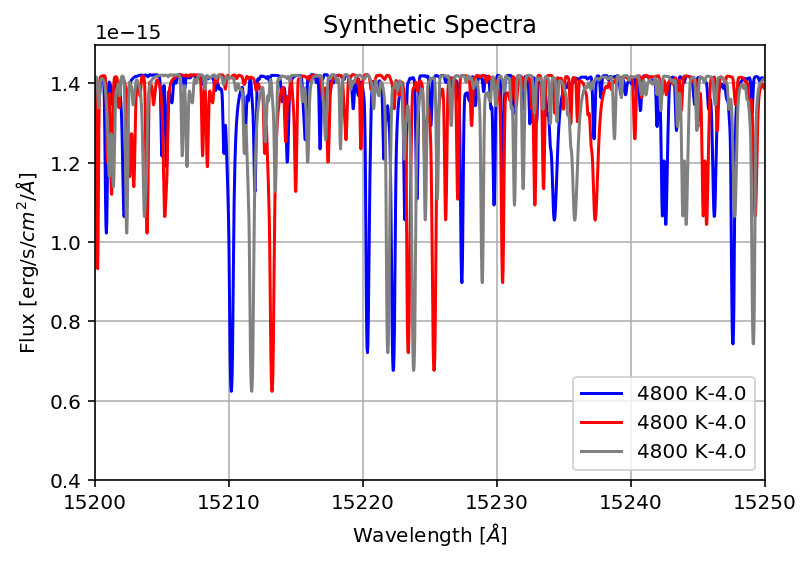

In [239]:
g= 'gray'
#plt.plot(wave, StelFluxEarth11200_40, color = 'palegreen', label = "11200 K-4.0")
#plt.plot(wave, StelFluxEarth04000_40, color = 'palegreen', label = "4000 K")
#plt.plot(wave, StelFluxEarth04000_40+StelFluxEarth05000_40, color = 'firebrick', label = "4000+5000")
#plt.plot(wave, StelFluxEarth11400_35, color = 'firebrick', label = "11400 K-3.5")
plt.plot(wave_obsB[trimA:trimB], StelFluxEarth04800_40[trimA:trimB], color = 'blue', label = "4800 K-4.0")
plt.plot(wave_obsR[trimA:trimB], StelFluxEarth04800_40[trimA:trimB], color = 'red', label = "4800 K-4.0")
plt.plot(wave[trimA:trimB], StelFluxEarth04800_40[trimA:trimB], color = g, label = "4800 K-4.0")

plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux [erg/s/$cm^2$/$\AA$]")
xlim(15200,15250)
#ylim(5e-16,2e-15)
plt.title("Synthetic Spectra")
plt.legend()
plt.grid()
plt.show()

#

# 

In [238]:
s = input("Open up a file: ")

Open up a file: m


# Wavelength files

In [2]:
var = fits.open("../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits")
wave = var[0].data
fits.info("../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits")
#fits.header()

Filename: ../Desktop/CJ_Astro/WAVE_PHOENIX-ACES-AGSS-COND-2011 (2).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (1569128,)   float64   


# OPENING PHOENIX FILES

## 2300 --> 2900

In [3]:
##################### SURFACE GRAVITY = 3.5 ########################

hdu02300_35 = fits.open("../Desktop/CJ_Astro/lte02300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02300_35 = hdu02300_35[0].data #in terms of joules
hdu02300_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02400_35 = fits.open("../Desktop/CJ_Astro/lte02400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02400_35 = hdu02400_35[0].data #in terms of joules
hdu02400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02500_35 = fits.open("../Desktop/CJ_Astro/lte02500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02500_35 = hdu02500_35[0].data #in terms of joules
hdu02500_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02600_35 = fits.open("../Desktop/CJ_Astro/lte02600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02600_35 = hdu02600_35[0].data #in terms of joules
hdu02600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02700_35 = fits.open("../Desktop/CJ_Astro/lte02700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02700_35 = hdu02700_35[0].data #in terms of joules
hdu02700_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02800_35 = fits.open("../Desktop/CJ_Astro/lte02800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02800_35 = hdu02800_35[0].data #in terms of joules
hdu02800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02900_35 = fits.open("../Desktop/CJ_Astro/lte02900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02900_35 = hdu02900_35[0].data #in terms of joules
hdu02900_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################
hdu02300_40 = fits.open("../Desktop/CJ_Astro/lte02300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02300_40 = hdu02300_40[0].data #in terms of joules
hdu02300_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02400_40 = fits.open("../Desktop/CJ_Astro/lte02400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02400_40 = hdu02400_40[0].data #in terms of joules
hdu02400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02500_40 = fits.open("../Desktop/CJ_Astro/lte02500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02500_40 = hdu02500_40[0].data #in terms of joules
hdu02500_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02600_40 = fits.open("../Desktop/CJ_Astro/lte02600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02600_40 = hdu02600_40[0].data #in terms of joules
hdu02600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02700_40 = fits.open("../Desktop/CJ_Astro/lte02700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02700_40 = hdu02700_40[0].data #in terms of joules
hdu02700_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02800_40 = fits.open("../Desktop/CJ_Astro/lte02800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02800_40 = hdu02800_40[0].data #in terms of joules
hdu02800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu02900_40 = fits.open("../Desktop/CJ_Astro/lte02900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux02900_40 = hdu02900_40[0].data #in terms of joules
hdu02900_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte02900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


## 3000 --> 3900

In [4]:
##################### SURFACE GRAVITY = 3.5 ########################
hdu03000_35 = fits.open("../Desktop/CJ_Astro/lte03000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03000_35 = hdu03000_35[0].data #in terms of joules
hdu03000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03100_35 = fits.open("../Desktop/CJ_Astro/lte03100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03100_35 = hdu03100_35[0].data #in terms of joules
hdu03100_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03200_35 = fits.open("../Desktop/CJ_Astro/lte03200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03200_35 = hdu03200_35[0].data #in terms of joules
hdu03200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03300_35 = fits.open("../Desktop/CJ_Astro/lte03300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03300_35 = hdu03300_35[0].data #in terms of joules
hdu03300_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03400_35 = fits.open("../Desktop/CJ_Astro/lte03400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03400_35 = hdu03400_35[0].data #in terms of joules
hdu03400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03500_35 = fits.open("../Desktop/CJ_Astro/lte03500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03500_35 = hdu03500_35[0].data #in terms of joules
hdu03500_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03600_35 = fits.open("../Desktop/CJ_Astro/lte03600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03600_35 = hdu03600_35[0].data #in terms of joules
hdu03600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03700_35 = fits.open("../Desktop/CJ_Astro/lte03700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03700_35 = hdu03700_35[0].data #in terms of joules
hdu03700_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03800_35 = fits.open("../Desktop/CJ_Astro/lte03800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03800_35 = hdu03800_35[0].data #in terms of joules
hdu03800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03900_35 = fits.open("../Desktop/CJ_Astro/lte03900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03900_35 = hdu03900_35[0].data #in terms of joules
hdu03900_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu03000_40 = fits.open("../Desktop/CJ_Astro/lte03000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03000_40 = hdu03000_40[0].data #in terms of joules
hdu03000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03100_40 = fits.open("../Desktop/CJ_Astro/lte03100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03100_40 = hdu03100_40[0].data #in terms of joules
hdu03100_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03200_40 = fits.open("../Desktop/CJ_Astro/lte03200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03200_40 = hdu03200_40[0].data #in terms of joules
hdu03200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03300_40 = fits.open("../Desktop/CJ_Astro/lte03300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03300_40 = hdu03300_40[0].data #in terms of joules
hdu03300_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03400_40 = fits.open("../Desktop/CJ_Astro/lte03400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03400_40 = hdu03400_40[0].data #in terms of joules
hdu03400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03500_40 = fits.open("../Desktop/CJ_Astro/lte03500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03500_40 = hdu03500_40[0].data #in terms of joules
hdu03500_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03600_40 = fits.open("../Desktop/CJ_Astro/lte03600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03600_40 = hdu03600_40[0].data #in terms of joules
hdu03600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03700_40 = fits.open("../Desktop/CJ_Astro/lte03700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03700_40 = hdu03700_40[0].data #in terms of joules
hdu03700_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03800_40 = fits.open("../Desktop/CJ_Astro/lte03800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03800_40 = hdu03800_40[0].data #in terms of joules
hdu03800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu03900_40 = fits.open("../Desktop/CJ_Astro/lte03900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux03900_40 = hdu03900_40[0].data #in terms of joules
hdu03900_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte03900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")



## 4000 --> 4900

In [5]:
##################### SURFACE GRAVITY = 3.5 ########################
hdu04000_35 = fits.open("../Desktop/CJ_Astro/lte04000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04000_35 = hdu04000_35[0].data #in terms of joules
hdu04000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04100_35 = fits.open("../Desktop/CJ_Astro/lte04100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04100_35 = hdu04100_35[0].data #in terms of joules
hdu04100_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04200_35 = fits.open("../Desktop/CJ_Astro/lte04200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04200_35 = hdu04200_35[0].data #in terms of joules
hdu04200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04300_35 = fits.open("../Desktop/CJ_Astro/lte04300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04300_35 = hdu04300_35[0].data #in terms of joules
hdu04300_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04400_35 = fits.open("../Desktop/CJ_Astro/lte04400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04400_35 = hdu04400_35[0].data #in terms of joules
hdu04400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04500_35 = fits.open("../Desktop/CJ_Astro/lte04500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04500_35 = hdu04500_35[0].data #in terms of joules
hdu04500_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04600_35 = fits.open("../Desktop/CJ_Astro/lte04600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04600_35 = hdu04600_35[0].data #in terms of joules
hdu04600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04700_35 = fits.open("../Desktop/CJ_Astro/lte04700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04700_35 = hdu04700_35[0].data #in terms of joules
hdu04700_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04800_35 = fits.open("../Desktop/CJ_Astro/lte04800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04800_35 = hdu04800_35[0].data #in terms of joules
hdu04800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04900_35 = fits.open("../Desktop/CJ_Astro/lte04900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04900_35 = hdu04900_35[0].data #in terms of joules
hdu04900_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu04000_40 = fits.open("../Desktop/CJ_Astro/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04000_40 = hdu04000_40[0].data #in terms of joules
hdu04000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04100_40 = fits.open("../Desktop/CJ_Astro/lte04100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04100_40 = hdu04100_40[0].data #in terms of joules
hdu04100_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04200_40 = fits.open("../Desktop/CJ_Astro/lte04200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04200_40 = hdu04200_40[0].data #in terms of joules
hdu04200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04300_40 = fits.open("../Desktop/CJ_Astro/lte04300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04300_40 = hdu04300_40[0].data #in terms of joules
hdu04300_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04400_40 = fits.open("../Desktop/CJ_Astro/lte04400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04400_40 = hdu04400_40[0].data #in terms of joules
hdu04400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04500_40 = fits.open("../Desktop/CJ_Astro/lte04500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04500_40 = hdu04500_40[0].data #in terms of joules
hdu04500_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04600_40 = fits.open("../Desktop/CJ_Astro/lte04600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04600_40 = hdu04600_40[0].data #in terms of joules
hdu04600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04700_40 = fits.open("../Desktop/CJ_Astro/lte04700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04700_40 = hdu04700_40[0].data #in terms of joules
hdu04700_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04800_40 = fits.open("../Desktop/CJ_Astro/lte04800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04800_40 = hdu04800_40[0].data #in terms of joules
hdu04800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu04900_40 = fits.open("../Desktop/CJ_Astro/lte04900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux04900_40 = hdu04900_40[0].data #in terms of joules
hdu04900_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte04900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


## 5000 --> 5900

In [6]:
##################### SURFACE GRAVITY = 3.5 ########################
hdu05000_35 = fits.open("../Desktop/CJ_Astro/lte05000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05000_35 = hdu05000_35[0].data #in terms of joules
hdu05000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05100_35 = fits.open("../Desktop/CJ_Astro/lte05100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05100_35 = hdu05100_35[0].data #in terms of joules
hdu05100_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05200_35 = fits.open("../Desktop/CJ_Astro/lte05200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05200_35 = hdu05200_35[0].data #in terms of joules
hdu05200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05300_35 = fits.open("../Desktop/CJ_Astro/lte05300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05300_35 = hdu05300_35[0].data #in terms of joules
hdu05300_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05400_35 = fits.open("../Desktop/CJ_Astro/lte05400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05400_35 = hdu05400_35[0].data #in terms of joules
hdu05400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05500_35 = fits.open("../Desktop/CJ_Astro/lte05500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05500_35 = hdu05500_35[0].data #in terms of joules
hdu05500_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05600_35 = fits.open("../Desktop/CJ_Astro/lte05600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05600_35 = hdu05600_35[0].data #in terms of joules
hdu05600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05700_35 = fits.open("../Desktop/CJ_Astro/lte05700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05700_35 = hdu05700_35[0].data #in terms of joules
hdu05700_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05800_35 = fits.open("../Desktop/CJ_Astro/lte05800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05800_35 = hdu05800_35[0].data #in terms of joules
hdu05800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05900_35 = fits.open("../Desktop/CJ_Astro/lte05900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05900_35 = hdu05900_35[0].data #in terms of joules
hdu05900_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu05000_40 = fits.open("../Desktop/CJ_Astro/lte05000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05000_40 = hdu05000_40[0].data #in terms of joules
hdu05000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05100_40 = fits.open("../Desktop/CJ_Astro/lte05100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05100_40 = hdu05100_40[0].data #in terms of joules
hdu05100_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05200_40 = fits.open("../Desktop/CJ_Astro/lte05200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05200_40 = hdu05200_40[0].data #in terms of joules
hdu05200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05300_40 = fits.open("../Desktop/CJ_Astro/lte05300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05300_40 = hdu05300_40[0].data #in terms of joules
hdu05300_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05400_40 = fits.open("../Desktop/CJ_Astro/lte05400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05400_40 = hdu05400_40[0].data #in terms of joules
hdu05400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05500_40 = fits.open("../Desktop/CJ_Astro/lte05500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05500_40 = hdu05500_40[0].data #in terms of joules
hdu05500_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05600_40 = fits.open("../Desktop/CJ_Astro/lte05600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05600_40 = hdu05600_40[0].data #in terms of joules
hdu05600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05700_40 = fits.open("../Desktop/CJ_Astro/lte05700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05700_40 = hdu05700_40[0].data #in terms of joules
hdu05700_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05800_40 = fits.open("../Desktop/CJ_Astro/lte05800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05800_40 = hdu05800_40[0].data #in terms of joules
hdu05800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu05900_40 = fits.open("../Desktop/CJ_Astro/lte05900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux05900_40 = hdu05900_40[0].data #in terms of joules
hdu05900_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte05900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


## 6000 --> 6900

In [7]:
##################### SURFACE GRAVITY = 3.5 ########################
hdu06000_35 = fits.open("../Desktop/CJ_Astro/lte06000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06000_35 = hdu06000_35[0].data #in terms of joules
hdu06000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06100_35 = fits.open("../Desktop/CJ_Astro/lte06100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06100_35 = hdu06100_35[0].data #in terms of joules
hdu06100_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06100-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06200_35 = fits.open("../Desktop/CJ_Astro/lte06200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06200_35 = hdu06200_35[0].data #in terms of joules
hdu06200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06300_35 = fits.open("../Desktop/CJ_Astro/lte06300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06300_35 = hdu06300_35[0].data #in terms of joules
hdu06300_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06300-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06400_35 = fits.open("../Desktop/CJ_Astro/lte06400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06400_35 = hdu06400_35[0].data #in terms of joules
hdu06400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06500_35 = fits.open("../Desktop/CJ_Astro/lte06500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06500_35 = hdu06500_35[0].data #in terms of joules
hdu06500_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06500-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06600_35 = fits.open("../Desktop/CJ_Astro/lte06600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06600_35 = hdu06600_35[0].data #in terms of joules
hdu06600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06700_35 = fits.open("../Desktop/CJ_Astro/lte06700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06700_35 = hdu06700_35[0].data #in terms of joules
hdu06700_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06700-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06800_35 = fits.open("../Desktop/CJ_Astro/lte06800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06800_35 = hdu06800_35[0].data #in terms of joules
hdu06800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06900_35 = fits.open("../Desktop/CJ_Astro/lte06900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06900_35 = hdu06900_35[0].data #in terms of joules
hdu06900_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06900-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu06000_40 = fits.open("../Desktop/CJ_Astro/lte06000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06000_40 = hdu06000_40[0].data #in terms of joules
hdu06000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06100_40 = fits.open("../Desktop/CJ_Astro/lte06100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06100_40 = hdu06100_40[0].data #in terms of joules
hdu06100_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06100-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06200_40 = fits.open("../Desktop/CJ_Astro/lte06200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06200_40 = hdu06200_40[0].data #in terms of joules
hdu06200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06300_40 = fits.open("../Desktop/CJ_Astro/lte06300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06300_40 = hdu06300_40[0].data #in terms of joules
hdu06300_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06300-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06400_40 = fits.open("../Desktop/CJ_Astro/lte06400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06400_40 = hdu06400_40[0].data #in terms of joules
hdu06400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06500_40 = fits.open("../Desktop/CJ_Astro/lte06500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06500_40 = hdu06500_40[0].data #in terms of joules
hdu06500_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06500-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06600_40 = fits.open("../Desktop/CJ_Astro/lte06600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06600_40 = hdu06600_40[0].data #in terms of joules
hdu06600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06700_40 = fits.open("../Desktop/CJ_Astro/lte06700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06700_40 = hdu06700_40[0].data #in terms of joules
hdu06700_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06700-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06800_40 = fits.open("../Desktop/CJ_Astro/lte06800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06800_40 = hdu06800_40[0].data #in terms of joules
hdu06800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu06900_40 = fits.open("../Desktop/CJ_Astro/lte06900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux06900_40 = hdu06900_40[0].data #in terms of joules
hdu06900_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte06900-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")



## 7000 --> 8800 (going by 200)

In [8]:
##################### SURFACE GRAVITY = 3.5 ########################
hdu07000_35 = fits.open("../Desktop/CJ_Astro/lte07000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07000_35 = hdu07000_35[0].data #in terms of joules
hdu07000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07200_35 = fits.open("../Desktop/CJ_Astro/lte07200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07200_35 = hdu07200_35[0].data #in terms of joules
hdu07200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07400_35 = fits.open("../Desktop/CJ_Astro/lte07400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07400_35 = hdu07400_35[0].data #in terms of joules
hdu07400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07600_35 = fits.open("../Desktop/CJ_Astro/lte07600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07600_35 = hdu07600_35[0].data #in terms of joules
hdu07600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07800_35 = fits.open("../Desktop/CJ_Astro/lte07800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07800_35 = hdu07800_35[0].data #in terms of joules
hdu07800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08000_35 = fits.open("../Desktop/CJ_Astro/lte08000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08000_35 = hdu08000_35[0].data #in terms of joules
hdu08000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08200_35 = fits.open("../Desktop/CJ_Astro/lte08200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08200_35 = hdu08200_35[0].data #in terms of joules
hdu08200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08400_35 = fits.open("../Desktop/CJ_Astro/lte08400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08400_35 = hdu08400_35[0].data #in terms of joules
hdu08400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08600_35 = fits.open("../Desktop/CJ_Astro/lte08600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08600_35 = hdu08600_35[0].data #in terms of joules
hdu08600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08800_35 = fits.open("../Desktop/CJ_Astro/lte08800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08800_35 = hdu08800_35[0].data #in terms of joules
hdu08800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu07000_40 = fits.open("../Desktop/CJ_Astro/lte07000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07000_40 = hdu07000_40[0].data #in terms of joules
hdu07000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07200_40 = fits.open("../Desktop/CJ_Astro/lte07200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07200_40 = hdu07200_40[0].data #in terms of joules
hdu07200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07400_40 = fits.open("../Desktop/CJ_Astro/lte07400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07400_40 = hdu07400_40[0].data #in terms of joules
hdu07400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07600_40 = fits.open("../Desktop/CJ_Astro/lte07600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07600_40 = hdu07600_40[0].data #in terms of joules
hdu07600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu07800_40 = fits.open("../Desktop/CJ_Astro/lte07800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux07800_40 = hdu07800_40[0].data #in terms of joules
hdu07800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte07800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


hdu08000_40 = fits.open("../Desktop/CJ_Astro/lte08000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08000_40 = hdu08000_40[0].data #in terms of joules
hdu08000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08200_40 = fits.open("../Desktop/CJ_Astro/lte08200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08200_40 = hdu08200_40[0].data #in terms of joules
hdu08200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08400_40 = fits.open("../Desktop/CJ_Astro/lte08400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08400_40 = hdu08400_40[0].data #in terms of joules
hdu08400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08600_40 = fits.open("../Desktop/CJ_Astro/lte08600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08600_40 = hdu08600_40[0].data #in terms of joules
hdu08600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu08800_40 = fits.open("../Desktop/CJ_Astro/lte08800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux08800_40 = hdu08800_40[0].data #in terms of joules
hdu08800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte08800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")




## 9000 --> 10800

In [9]:
hdu09000_35 = fits.open("../Desktop/CJ_Astro/lte09000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09000_35 = hdu09000_35[0].data #in terms of joules
hdu09000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09200_35 = fits.open("../Desktop/CJ_Astro/lte09200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09200_35 = hdu09200_35[0].data #in terms of joules
hdu09200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09400_35 = fits.open("../Desktop/CJ_Astro/lte09400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09400_35 = hdu09400_35[0].data #in terms of joules
hdu09400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09600_35 = fits.open("../Desktop/CJ_Astro/lte09600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09600_35 = hdu09600_35[0].data #in terms of joules
hdu09600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09800_35 = fits.open("../Desktop/CJ_Astro/lte09800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09800_35 = hdu09800_35[0].data #in terms of joules
hdu09800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10000_35 = fits.open("../Desktop/CJ_Astro/lte10000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10000_35 = hdu10000_35[0].data #in terms of joules
hdu10000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10200_35 = fits.open("../Desktop/CJ_Astro/lte10200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10200_35 = hdu10200_35[0].data #in terms of joules
hdu10200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10400_35 = fits.open("../Desktop/CJ_Astro/lte10400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10400_35 = hdu10400_35[0].data #in terms of joules
hdu10400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10600_35 = fits.open("../Desktop/CJ_Astro/lte10600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10600_35 = hdu10600_35[0].data #in terms of joules
hdu10600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10800_35 = fits.open("../Desktop/CJ_Astro/lte10800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10800_35 = hdu10800_35[0].data #in terms of joules
hdu10800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu09000_40 = fits.open("../Desktop/CJ_Astro/lte09000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09000_40 = hdu09000_40[0].data #in terms of joules
hdu09000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09200_40 = fits.open("../Desktop/CJ_Astro/lte09200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09200_40 = hdu09200_40[0].data #in terms of joules
hdu09200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09400_40 = fits.open("../Desktop/CJ_Astro/lte09400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09400_40 = hdu09400_40[0].data #in terms of joules
hdu09400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09600_40 = fits.open("../Desktop/CJ_Astro/lte09600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09600_40 = hdu09600_40[0].data #in terms of joules
hdu09600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu09800_40 = fits.open("../Desktop/CJ_Astro/lte09800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux09800_40 = hdu09800_40[0].data #in terms of joules
hdu09800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte09800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


hdu10000_40 = fits.open("../Desktop/CJ_Astro/lte10000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10000_40 = hdu10000_40[0].data #in terms of joules
hdu10000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10200_40 = fits.open("../Desktop/CJ_Astro/lte10200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10200_40 = hdu10200_40[0].data #in terms of joules
hdu10200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10400_40 = fits.open("../Desktop/CJ_Astro/lte10400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10400_40 = hdu10400_40[0].data #in terms of joules
hdu10400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10600_40 = fits.open("../Desktop/CJ_Astro/lte10600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10600_40 = hdu10600_40[0].data #in terms of joules
hdu10600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu10800_40 = fits.open("../Desktop/CJ_Astro/lte10800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux10800_40 = hdu10800_40[0].data #in terms of joules
hdu10800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte10800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")





## 11000 --> 12000

In [10]:
hdu11000_35 = fits.open("../Desktop/CJ_Astro/lte11000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11000_35 = hdu11000_35[0].data #in terms of joules
hdu11000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11200_35 = fits.open("../Desktop/CJ_Astro/lte11200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11200_35 = hdu11200_35[0].data #in terms of joules
hdu11200_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11200-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11400_35 = fits.open("../Desktop/CJ_Astro/lte11400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11400_35 = hdu11400_35[0].data #in terms of joules
hdu11400_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11600_35 = fits.open("../Desktop/CJ_Astro/lte11600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11600_35 = hdu11600_35[0].data #in terms of joules
hdu11600_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11600-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11800_35 = fits.open("../Desktop/CJ_Astro/lte11800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11800_35 = hdu11800_35[0].data #in terms of joules
hdu11800_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11800-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu12000_35 = fits.open("../Desktop/CJ_Astro/lte12000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux12000_35 = hdu12000_35[0].data #in terms of joules
hdu12000_35_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte12000-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


##################### SURFACE GRAVITY = 4.0 ########################

hdu11000_40 = fits.open("../Desktop/CJ_Astro/lte11000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11000_40 = hdu11000_40[0].data #in terms of joules
hdu11000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11200_40 = fits.open("../Desktop/CJ_Astro/lte11200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11200_40 = hdu11200_40[0].data #in terms of joules
hdu11200_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11200-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11400_40 = fits.open("../Desktop/CJ_Astro/lte11400-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11400_40 = hdu11400_40[0].data #in terms of joules
hdu11400_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11400-3.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11600_40 = fits.open("../Desktop/CJ_Astro/lte11600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11600_40 = hdu11600_40[0].data #in terms of joules
hdu11600_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11600-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

hdu11800_40 = fits.open("../Desktop/CJ_Astro/lte11800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux11800_40 = hdu11800_40[0].data #in terms of joules
hdu11800_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte11800-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")


hdu12000_40 = fits.open("../Desktop/CJ_Astro/lte12000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")  # open a FITS file
flux12000_40 = hdu12000_40[0].data #in terms of joules
hdu12000_40_file = get_pkg_data_filename("../Desktop/CJ_Astro/lte12000-4.00-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits")

In [11]:
#fits_table_filename = fits.util.get_testdata_filepath('btable.fits')
hdu02300_35.close()
hdu04000_40.close()
hdu05000_35.close()
hdu05000_40.close()
hdu06000_35.close()
hdu09000_40.close()


# STELLAR RADII


In [37]:
print("Stellar Radii of 04000_40: %.3E cm" %(PHXREFF04000_40))


# 2300 --> 2900
## 3.5
PHXREFF02300_35 = fits.getval(hdu02300_35_file, 'PHXREFF')
PHXREFF02400_35 = fits.getval(hdu02400_35_file, 'PHXREFF')
PHXREFF02500_35 = fits.getval(hdu02500_35_file, 'PHXREFF')
PHXREFF02600_35 = fits.getval(hdu02600_35_file, 'PHXREFF')
PHXREFF02700_35 = fits.getval(hdu02700_35_file, 'PHXREFF')
PHXREFF02800_35 = fits.getval(hdu02800_35_file, 'PHXREFF')
PHXREFF02900_35 = fits.getval(hdu02900_35_file, 'PHXREFF')


## 4.0
PHXREFF02300_40 = fits.getval(hdu02300_40_file, 'PHXREFF')
PHXREFF02400_40 = fits.getval(hdu02400_40_file, 'PHXREFF')
PHXREFF02500_40 = fits.getval(hdu02500_40_file, 'PHXREFF')
PHXREFF02600_40 = fits.getval(hdu02600_40_file, 'PHXREFF')
PHXREFF02700_40 = fits.getval(hdu02700_40_file, 'PHXREFF')
PHXREFF02800_40 = fits.getval(hdu02800_40_file, 'PHXREFF')
PHXREFF02900_40 = fits.getval(hdu02900_40_file, 'PHXREFF')


# 3000 --> 3900
## 3.5
PHXREFF03000_35 = fits.getval(hdu03000_35_file, 'PHXREFF')
PHXREFF03100_35 = fits.getval(hdu03100_35_file, 'PHXREFF')
PHXREFF03200_35 = fits.getval(hdu03200_35_file, 'PHXREFF')
PHXREFF03300_35 = fits.getval(hdu03300_35_file, 'PHXREFF')
PHXREFF03400_35 = fits.getval(hdu03400_35_file, 'PHXREFF')
PHXREFF03500_35 = fits.getval(hdu03500_35_file, 'PHXREFF')
PHXREFF03600_35 = fits.getval(hdu03600_35_file, 'PHXREFF')
PHXREFF03700_35 = fits.getval(hdu03700_35_file, 'PHXREFF')
PHXREFF03800_35 = fits.getval(hdu03800_35_file, 'PHXREFF')
PHXREFF03900_35 = fits.getval(hdu03900_35_file, 'PHXREFF')



## 4.0
PHXREFF03000_40 = fits.getval(hdu03000_40_file, 'PHXREFF')
PHXREFF03100_40 = fits.getval(hdu03100_40_file, 'PHXREFF')
PHXREFF03200_40 = fits.getval(hdu03200_40_file, 'PHXREFF')
PHXREFF03300_40 = fits.getval(hdu03300_40_file, 'PHXREFF')
PHXREFF03400_40 = fits.getval(hdu03400_40_file, 'PHXREFF')
PHXREFF03500_40 = fits.getval(hdu03500_40_file, 'PHXREFF')
PHXREFF03600_40 = fits.getval(hdu03600_40_file, 'PHXREFF')
PHXREFF03700_40 = fits.getval(hdu03700_40_file, 'PHXREFF')
PHXREFF03800_40 = fits.getval(hdu03800_40_file, 'PHXREFF')
PHXREFF03900_40 = fits.getval(hdu03900_40_file, 'PHXREFF')

# 4000 --> 4900
## 3.5
PHXREFF04000_35 = fits.getval(hdu04000_35_file, 'PHXREFF')
PHXREFF04100_35 = fits.getval(hdu04100_35_file, 'PHXREFF')
PHXREFF04200_35 = fits.getval(hdu04200_35_file, 'PHXREFF')
PHXREFF04300_35 = fits.getval(hdu04300_35_file, 'PHXREFF')
PHXREFF04400_35 = fits.getval(hdu04400_35_file, 'PHXREFF')
PHXREFF04500_35 = fits.getval(hdu04500_35_file, 'PHXREFF')
PHXREFF04600_35 = fits.getval(hdu04600_35_file, 'PHXREFF')
PHXREFF04700_35 = fits.getval(hdu04700_35_file, 'PHXREFF')
PHXREFF04800_35 = fits.getval(hdu04800_35_file, 'PHXREFF')
PHXREFF04900_35 = fits.getval(hdu04900_35_file, 'PHXREFF')

## 4.0
PHXREFF04000_40 = fits.getval(hdu04000_40_file, 'PHXREFF')
PHXREFF04100_40 = fits.getval(hdu04100_40_file, 'PHXREFF')
PHXREFF04200_40 = fits.getval(hdu04200_40_file, 'PHXREFF')
PHXREFF04300_40 = fits.getval(hdu04300_40_file, 'PHXREFF')
PHXREFF04400_40 = fits.getval(hdu04400_40_file, 'PHXREFF')
PHXREFF04500_40 = fits.getval(hdu04500_40_file, 'PHXREFF')
PHXREFF04600_40 = fits.getval(hdu04600_40_file, 'PHXREFF')
PHXREFF04700_40 = fits.getval(hdu04700_40_file, 'PHXREFF')
PHXREFF04800_40 = fits.getval(hdu04800_40_file, 'PHXREFF')
PHXREFF04900_40 = fits.getval(hdu04900_40_file, 'PHXREFF')
# 5000 --> 5900
## 3.5
PHXREFF05000_35 = fits.getval(hdu05000_35_file, 'PHXREFF')
PHXREFF05100_35 = fits.getval(hdu05100_35_file, 'PHXREFF')
PHXREFF05200_35 = fits.getval(hdu05200_35_file, 'PHXREFF')
PHXREFF05300_35 = fits.getval(hdu05300_35_file, 'PHXREFF')
PHXREFF05400_35 = fits.getval(hdu05400_35_file, 'PHXREFF')
PHXREFF05500_35 = fits.getval(hdu05500_35_file, 'PHXREFF')
PHXREFF05600_35 = fits.getval(hdu05600_35_file, 'PHXREFF')
PHXREFF05700_35 = fits.getval(hdu05700_35_file, 'PHXREFF')
PHXREFF05800_35 = fits.getval(hdu05800_35_file, 'PHXREFF')
PHXREFF05900_35 = fits.getval(hdu05900_35_file, 'PHXREFF')

## 4.0
PHXREFF05000_40 = fits.getval(hdu05000_40_file, 'PHXREFF')
PHXREFF05100_40 = fits.getval(hdu05100_40_file, 'PHXREFF')
PHXREFF05200_40 = fits.getval(hdu05200_40_file, 'PHXREFF')
PHXREFF05300_40 = fits.getval(hdu05300_40_file, 'PHXREFF')
PHXREFF05400_40 = fits.getval(hdu05400_40_file, 'PHXREFF')
PHXREFF05500_40 = fits.getval(hdu05500_40_file, 'PHXREFF')
PHXREFF05600_40 = fits.getval(hdu05600_40_file, 'PHXREFF')
PHXREFF05700_40 = fits.getval(hdu05700_40_file, 'PHXREFF')
PHXREFF05800_40 = fits.getval(hdu05800_40_file, 'PHXREFF')
PHXREFF05900_40 = fits.getval(hdu05900_40_file, 'PHXREFF')
# 6000 --> 6900
## 3.5
PHXREFF06000_35 = fits.getval(hdu06000_35_file, 'PHXREFF')
PHXREFF06100_35 = fits.getval(hdu06100_35_file, 'PHXREFF')
PHXREFF06200_35 = fits.getval(hdu06200_35_file, 'PHXREFF')
PHXREFF06300_35 = fits.getval(hdu06300_35_file, 'PHXREFF')
PHXREFF06400_35 = fits.getval(hdu06400_35_file, 'PHXREFF')
PHXREFF06500_35 = fits.getval(hdu06500_35_file, 'PHXREFF')
PHXREFF06600_35 = fits.getval(hdu06600_35_file, 'PHXREFF')
PHXREFF06700_35 = fits.getval(hdu06700_35_file, 'PHXREFF')
PHXREFF06800_35 = fits.getval(hdu06800_35_file, 'PHXREFF')
PHXREFF06900_35 = fits.getval(hdu06900_35_file, 'PHXREFF')

## 4.0

PHXREFF06000_40 = fits.getval(hdu06000_40_file, 'PHXREFF')
PHXREFF06100_40 = fits.getval(hdu06100_40_file, 'PHXREFF')
PHXREFF06200_40 = fits.getval(hdu06200_40_file, 'PHXREFF')
PHXREFF06300_40 = fits.getval(hdu06300_40_file, 'PHXREFF')
PHXREFF06400_40 = fits.getval(hdu06400_40_file, 'PHXREFF')
PHXREFF06500_40 = fits.getval(hdu06500_40_file, 'PHXREFF')
PHXREFF06600_40 = fits.getval(hdu06600_40_file, 'PHXREFF')
PHXREFF06700_40 = fits.getval(hdu06700_40_file, 'PHXREFF')
PHXREFF06800_40 = fits.getval(hdu06800_40_file, 'PHXREFF')
PHXREFF06900_40 = fits.getval(hdu06900_40_file, 'PHXREFF')
# 7000 --> 8800
## 3.5
PHXREFF07000_35 = fits.getval(hdu07000_35_file, 'PHXREFF')
PHXREFF07200_35 = fits.getval(hdu07200_35_file, 'PHXREFF')
PHXREFF07400_35 = fits.getval(hdu07400_35_file, 'PHXREFF')
PHXREFF07600_35 = fits.getval(hdu07600_35_file, 'PHXREFF')
PHXREFF07800_35 = fits.getval(hdu07800_35_file, 'PHXREFF')
PHXREFF08000_35 = fits.getval(hdu08000_35_file, 'PHXREFF')
PHXREFF08200_35 = fits.getval(hdu08200_35_file, 'PHXREFF')
PHXREFF08400_35 = fits.getval(hdu08400_35_file, 'PHXREFF')
PHXREFF08600_35 = fits.getval(hdu08600_35_file, 'PHXREFF')
PHXREFF08800_35 = fits.getval(hdu08800_35_file, 'PHXREFF')

## 4.0
PHXREFF07000_40 = fits.getval(hdu07000_40_file, 'PHXREFF')
PHXREFF07200_40 = fits.getval(hdu07200_40_file, 'PHXREFF')
PHXREFF07400_40 = fits.getval(hdu07400_40_file, 'PHXREFF')
PHXREFF07600_40 = fits.getval(hdu07600_40_file, 'PHXREFF')
PHXREFF07800_40 = fits.getval(hdu07800_40_file, 'PHXREFF')
PHXREFF08000_40 = fits.getval(hdu08000_40_file, 'PHXREFF')
PHXREFF08200_40 = fits.getval(hdu08200_40_file, 'PHXREFF')
PHXREFF08400_40 = fits.getval(hdu08400_40_file, 'PHXREFF')
PHXREFF08600_40 = fits.getval(hdu08600_40_file, 'PHXREFF')
PHXREFF08800_40 = fits.getval(hdu08800_40_file, 'PHXREFF')

# 9000 --> 10800
## 3.5
PHXREFF09000_35 = fits.getval(hdu09000_35_file, 'PHXREFF')
PHXREFF09200_35 = fits.getval(hdu09200_35_file, 'PHXREFF')
PHXREFF09400_35 = fits.getval(hdu09400_35_file, 'PHXREFF')
PHXREFF09600_35 = fits.getval(hdu09600_35_file, 'PHXREFF')
PHXREFF09800_35 = fits.getval(hdu09800_35_file, 'PHXREFF')
PHXREFF10000_35 = fits.getval(hdu10000_35_file, 'PHXREFF')
PHXREFF10200_35 = fits.getval(hdu10200_35_file, 'PHXREFF')
PHXREFF10400_35 = fits.getval(hdu10400_35_file, 'PHXREFF')
PHXREFF10600_35 = fits.getval(hdu10600_35_file, 'PHXREFF')
PHXREFF10800_35 = fits.getval(hdu10800_35_file, 'PHXREFF')

## 4.0
PHXREFF09000_40 = fits.getval(hdu09000_40_file, 'PHXREFF')
PHXREFF09200_40 = fits.getval(hdu09200_40_file, 'PHXREFF')
PHXREFF09400_40 = fits.getval(hdu09400_40_file, 'PHXREFF')
PHXREFF09600_40 = fits.getval(hdu09600_40_file, 'PHXREFF')
PHXREFF09800_40 = fits.getval(hdu09800_40_file, 'PHXREFF')
PHXREFF10000_40 = fits.getval(hdu10000_40_file, 'PHXREFF')
PHXREFF10200_40 = fits.getval(hdu10200_40_file, 'PHXREFF')
PHXREFF10400_40 = fits.getval(hdu10400_40_file, 'PHXREFF')
PHXREFF10600_40 = fits.getval(hdu10600_40_file, 'PHXREFF')
PHXREFF10800_40 = fits.getval(hdu10800_40_file, 'PHXREFF')

# 11000 --> 12000
## 3.5
PHXREFF11000_35 = fits.getval(hdu11000_35_file, 'PHXREFF')
PHXREFF11200_35 = fits.getval(hdu11200_35_file, 'PHXREFF')
PHXREFF11400_35 = fits.getval(hdu11400_35_file, 'PHXREFF')
PHXREFF11600_35 = fits.getval(hdu11600_35_file, 'PHXREFF')
PHXREFF11800_35 = fits.getval(hdu11800_35_file, 'PHXREFF')
PHXREFF12000_35 = fits.getval(hdu12000_35_file, 'PHXREFF')


## 4.0
PHXREFF11000_40 = fits.getval(hdu11000_40_file, 'PHXREFF')
PHXREFF11200_40 = fits.getval(hdu11200_40_file, 'PHXREFF')
PHXREFF11400_40 = fits.getval(hdu11400_40_file, 'PHXREFF')
PHXREFF11600_40 = fits.getval(hdu11600_40_file, 'PHXREFF')
PHXREFF11800_40 = fits.getval(hdu11800_40_file, 'PHXREFF')
PHXREFF12000_40 = fits.getval(hdu12000_40_file, 'PHXREFF')


PHXMASS05700_40 = fits.getval(hdu05700_40_file, 'PHXMASS')

print("Stellar Radii of 04000_40: %.3E cm" %(PHXREFF04000_40))
print("%.3E"%(PHXREFF05700_40*1e-2))
print("%.3E"% (PHXMASS05700_40*1e-3))

Stellar Radii of 04000_40: 8.749E+10 cm
Stellar Radii of 04000_40: 8.749E+10 cm
1.246E+09
2.329E+30


In [49]:
# Important values
dM67_PC = 900 # Distance to M67 in parsecs
pc_cm = 3.0856776e18
#Spc_Scm = 9.5214e36   # 1 sq pc = 9.5214 * 10^36  sq cm
dM67_cm = dM67_PC * pc_cm # Distance to M67 in centimeters
InvSq = 4*pi*dM67_cm**2
cm_A = 1e8 # converting centimeters to angstroms

#wavecut = (wave > 16400) & (wave < 16600)
#print(wavecut.sum())
#print(wave.sum())
# pi
print("Distance to M67: %.3E cm"% dM67)
print("Distance to M67: %.3E pc"% dM67_PC)

Distance to M67: 2.777E+21 cm
Distance to M67: 9.000E+02 pc


## STELLAR FLUX FROM EARTH

In [50]:
'''
Units: (erg/s/A)/pc^2
So, take the units of the files erg/s/cm^2/cm => divide by 1e8, multiply by number of sq. cm on the surface of the star 
=> meaning, multiply by the surface area of the star in cm [given in the file header]
And finally, multiply by the inverse square. (4*pi*(distance(pc)^2))
'''   
  

'\nUnits: (erg/s/A)/pc^2\nSo, take the units of the files erg/s/cm^2/cm => divide by 1e8, multiply by number of sq. cm on the surface of the star \n=> meaning, multiply by the surface area of the star in cm [given in the file header]\nAnd finally, multiply by the inverse square. (4*pi*(distance(pc)^2))\n'

# 2300 --> 2900



In [51]:
## 35
StelArea02300_35 = 4*pi*PHXREFF02300_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02300_35 = flux02300_35/cm_A*StelArea02300_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02400_35 = 4*pi*PHXREFF02400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02400_35 = flux02400_35/cm_A*StelArea02400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02500_35 = 4*pi*PHXREFF02500_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02500_35 = flux02500_35/cm_A*StelArea02500_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02600_35 = 4*pi*PHXREFF02600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02600_35 = flux02600_35/cm_A*StelArea02600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02700_35 = 4*pi*PHXREFF02700_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02700_35 = flux02700_35/cm_A*StelArea02700_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02800_35 = 4*pi*PHXREFF02800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02800_35 = flux02800_35/cm_A*StelArea02800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02900_35 = 4*pi*PHXREFF02900_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth02900_35 = flux02900_35/cm_A*StelArea02900_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



## 40

StelArea02300_40 = 4*pi*PHXREFF02300_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02300_40 = flux02300_40/cm_A*StelArea02300_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02400_40 = 4*pi*PHXREFF02400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02400_40 = flux02400_40/cm_A*StelArea02400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02500_40 = 4*pi*PHXREFF02500_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02500_40 = flux02500_40/cm_A*StelArea02500_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02600_40 = 4*pi*PHXREFF02600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02600_40 = flux02600_40/cm_A*StelArea02600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02700_40 = 4*pi*PHXREFF02700_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02700_40 = flux02700_40/cm_A*StelArea02700_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02800_40 = 4*pi*PHXREFF02800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02800_40 = flux02800_40/cm_A*StelArea02800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea02900_40 = 4*pi*PHXREFF02900_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth02900_40 = flux02900_40/cm_A*StelArea02900_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



# 3000 --> 3900




In [52]:
## 35
StelArea03000_35 = 4*pi*PHXREFF03000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03000_35 = flux03000_35/cm_A * StelArea03000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03100_35 = 4*pi*PHXREFF03100_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03100_35 = flux03100_35/cm_A*StelArea03100_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03200_35 = 4*pi*PHXREFF03200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03200_35 = flux03200_35/cm_A*StelArea03200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03300_35 = 4*pi*PHXREFF03300_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03300_35 = flux03300_35/cm_A*StelArea03300_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03400_35 = 4*pi*PHXREFF03400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03400_35 = flux03400_35/cm_A*StelArea03400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03500_35 = 4*pi*PHXREFF03500_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03500_35 = flux03500_35/cm_A*StelArea03500_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03600_35 = 4*pi*PHXREFF03600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03600_35 = flux03600_35/cm_A*StelArea03600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03700_35 = 4*pi*PHXREFF03700_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03700_35 = flux03700_35/cm_A*StelArea03700_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03800_35 = 4*pi*PHXREFF03800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03800_35 = flux03800_35/cm_A*StelArea03800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03900_35 = 4*pi*PHXREFF03900_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth03900_35 = flux03900_35/cm_A*StelArea03900_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



## 40
StelArea03000_40 = 4*pi*PHXREFF03000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03000_40 = flux03000_40/cm_A * StelArea03000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03100_40 = 4*pi*PHXREFF03100_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03100_40 = flux03100_40/cm_A*StelArea03100_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03200_40 = 4*pi*PHXREFF03200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03200_40 = flux03200_40/cm_A*StelArea03200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03300_40 = 4*pi*PHXREFF03300_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03300_40 = flux03300_40/cm_A*StelArea03300_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03400_40 = 4*pi*PHXREFF03400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03400_40 = flux03400_40/cm_A*StelArea03400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03500_40 = 4*pi*PHXREFF03500_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03500_40 = flux03500_40/cm_A*StelArea03500_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03600_40 = 4*pi*PHXREFF03600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03600_40 = flux03600_40/cm_A*StelArea03600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03700_40 = 4*pi*PHXREFF03700_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03700_40 = flux03700_40/cm_A*StelArea03700_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03800_40 = 4*pi*PHXREFF03800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03800_40 = flux03800_40/cm_A*StelArea03800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea03900_40 = 4*pi*PHXREFF03900_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth03900_40 = flux03900_40/cm_A*StelArea03900_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



# 4000 --> 4900



In [53]:
## 35
StelArea04000_35 = 4*pi*PHXREFF04000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04000_35 = flux04000_35/cm_A*StelArea04000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04100_35 = 4*pi*PHXREFF04100_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04100_35 = flux04100_35/cm_A*StelArea04100_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04200_35 = 4*pi*PHXREFF04200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04200_35 = flux04200_35/cm_A*StelArea04200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04300_35 = 4*pi*PHXREFF04300_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04300_35 = flux04300_35/cm_A*StelArea04300_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04400_35 = 4*pi*PHXREFF04400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04400_35 = flux04400_35/cm_A*StelArea04400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04500_35 = 4*pi*PHXREFF04500_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04500_35 = flux04500_35/cm_A*StelArea04500_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04600_35 = 4*pi*PHXREFF04600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04600_35 = flux04600_35/cm_A*StelArea04600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04700_35 = 4*pi*PHXREFF04700_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04700_35 = flux04700_35/cm_A*StelArea04700_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04800_35 = 4*pi*PHXREFF04800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04800_35 = flux04800_35/cm_A*StelArea04800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04900_35 = 4*pi*PHXREFF04900_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth04900_35 = flux04900_35/cm_A*StelArea04900_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)


## 40

StelArea04000_40 = 4*pi*PHXREFF04000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04000_40 = flux04000_40/cm_A*StelArea04000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04100_40 = 4*pi*PHXREFF04100_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04100_40 = flux04100_40/cm_A*StelArea04100_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04200_40 = 4*pi*PHXREFF04200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04200_40 = flux04200_40/cm_A*StelArea04200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04300_40 = 4*pi*PHXREFF04300_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04300_40 = flux04300_40/cm_A*StelArea04300_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04400_40 = 4*pi*PHXREFF04400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04400_40 = flux04400_40/cm_A*StelArea04400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04500_40 = 4*pi*PHXREFF04500_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04500_40 = flux04500_40/cm_A*StelArea04500_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04600_40 = 4*pi*PHXREFF04600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04600_40 = flux04600_40/cm_A*StelArea04600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04700_40 = 4*pi*PHXREFF04700_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04700_40 = flux04700_40/cm_A*StelArea04700_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04800_40 = 4*pi*PHXREFF04800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04800_40 = flux04800_40/cm_A*StelArea04800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea04900_40 = 4*pi*PHXREFF04900_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth04900_40 = flux04900_40/cm_A*StelArea04900_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




# 5000 --> 5900



In [54]:
## 35
StelArea05000_35 = 4*pi*PHXREFF05000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05000_35 = flux05000_35/cm_A*StelArea05000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05100_35 = 4*pi*PHXREFF05100_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05100_35 = flux05100_35/cm_A*StelArea05100_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05200_35 = 4*pi*PHXREFF05200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05200_35 = flux05200_35/cm_A*StelArea05200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05300_35 = 4*pi*PHXREFF05300_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05300_35 = flux05300_35/cm_A*StelArea05300_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05400_35 = 4*pi*PHXREFF05400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05400_35 = flux05400_35/cm_A*StelArea05400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05500_35 = 4*pi*PHXREFF05500_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05500_35 = flux05500_35/cm_A*StelArea05500_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05600_35 = 4*pi*PHXREFF05600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05600_35 = flux05600_35/cm_A*StelArea05600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05700_35 = 4*pi*PHXREFF05700_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05700_35 = flux05700_35/cm_A*StelArea05700_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05800_35 = 4*pi*PHXREFF05800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05800_35 = flux05800_35/cm_A*StelArea05800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05900_35 = 4*pi*PHXREFF05900_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth05900_35 = flux05900_35/cm_A*StelArea05900_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




## 40

StelArea05000_40 = 4*pi*PHXREFF05000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05000_40 = flux05000_40/cm_A*StelArea05000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05100_40 = 4*pi*PHXREFF05100_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05100_40 = flux05100_40/cm_A*StelArea05100_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05200_40 = 4*pi*PHXREFF05200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05200_40 = flux05200_40/cm_A*StelArea05200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05300_40 = 4*pi*PHXREFF05300_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05300_40 = flux05300_40/cm_A*StelArea05300_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05400_40 = 4*pi*PHXREFF05400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05400_40 = flux05400_40/cm_A*StelArea05400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05500_40 = 4*pi*PHXREFF05500_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05500_40 = flux05500_40/cm_A*StelArea05500_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05600_40 = 4*pi*PHXREFF05600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05600_40 = flux05600_40/cm_A*StelArea05600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05700_40 = 4*pi*PHXREFF05700_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05700_40 = flux05700_40/cm_A*StelArea05700_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05800_40 = 4*pi*PHXREFF05800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05800_40 = flux05800_40/cm_A*StelArea05800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea05900_40 = 4*pi*PHXREFF05900_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth05900_40 = flux05900_40/cm_A*StelArea05900_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




# 6000 --> 6900




In [55]:
## 35
StelArea06000_35 = 4*pi*PHXREFF06000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06000_35 = flux06000_35/cm_A * StelArea06000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06100_35 = 4*pi*PHXREFF06100_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06100_35 = flux06100_35/cm_A*StelArea06100_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06200_35 = 4*pi*PHXREFF06200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06200_35 = flux06200_35/cm_A*StelArea06200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06300_35 = 4*pi*PHXREFF06300_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06300_35 = flux06300_35/cm_A*StelArea06300_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06400_35 = 4*pi*PHXREFF06400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06400_35 = flux06400_35/cm_A*StelArea06400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06500_35 = 4*pi*PHXREFF06500_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06500_35 = flux06500_35/cm_A*StelArea06500_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06600_35 = 4*pi*PHXREFF06600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06600_35 = flux06600_35/cm_A*StelArea06600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06700_35 = 4*pi*PHXREFF06700_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06700_35 = flux06700_35/cm_A*StelArea06700_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06800_35 = 4*pi*PHXREFF06800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06800_35 = flux06800_35/cm_A*StelArea06800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06900_35 = 4*pi*PHXREFF06900_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth06900_35 = flux06900_35/cm_A*StelArea06900_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



## 40


StelArea06000_40 = 4*pi*PHXREFF06000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06000_40 = flux06000_40/cm_A * StelArea06000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06100_40 = 4*pi*PHXREFF06100_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06100_40 = flux06100_40/cm_A*StelArea06100_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06200_40 = 4*pi*PHXREFF06200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06200_40 = flux06200_40/cm_A*StelArea06200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06300_40 = 4*pi*PHXREFF06300_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06300_40 = flux06300_40/cm_A*StelArea06300_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06400_40 = 4*pi*PHXREFF06400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06400_40 = flux06400_40/cm_A*StelArea06400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06500_40 = 4*pi*PHXREFF06500_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06500_40 = flux06500_40/cm_A*StelArea06500_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06600_40 = 4*pi*PHXREFF06600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06600_40 = flux06600_40/cm_A*StelArea06600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06700_40 = 4*pi*PHXREFF06700_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06700_40 = flux06700_40/cm_A*StelArea06700_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06800_40 = 4*pi*PHXREFF06800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06800_40 = flux06800_40/cm_A*StelArea06800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea06900_40 = 4*pi*PHXREFF06900_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth06900_40 = flux06900_40/cm_A*StelArea06900_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)


# 7000 --> 8800



In [56]:
## 35
StelArea07000_35 = 4*pi*PHXREFF07000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth07000_35 = flux07000_35/cm_A * StelArea07000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07200_35 = 4*pi*PHXREFF07200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth07200_35 = flux07200_35/cm_A*StelArea07200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07400_35 = 4*pi*PHXREFF07400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth07400_35 = flux07400_35/cm_A*StelArea07400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07600_35 = 4*pi*PHXREFF07600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth07600_35 = flux07600_35/cm_A*StelArea07600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07800_35 = 4*pi*PHXREFF07800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth07800_35 = flux07800_35/cm_A*StelArea07800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08000_35 = 4*pi*PHXREFF08000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth08000_35 = flux08000_35/cm_A*StelArea08000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08200_35 = 4*pi*PHXREFF08200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth08200_35 = flux08200_35/cm_A*StelArea08200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08400_35 = 4*pi*PHXREFF08400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth08400_35 = flux08400_35/cm_A*StelArea08400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08600_35 = 4*pi*PHXREFF08600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth08600_35 = flux08600_35/cm_A*StelArea08600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08800_35 = 4*pi*PHXREFF08800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth08800_35 = flux08800_35/cm_A*StelArea08800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




## 40
StelArea07000_40 = 4*pi*PHXREFF07000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth07000_40 = flux07000_40/cm_A * StelArea07000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07200_40 = 4*pi*PHXREFF07200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth07200_40 = flux07200_40/cm_A*StelArea07200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07400_40 = 4*pi*PHXREFF07400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth07400_40 = flux07400_40/cm_A*StelArea07400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07600_40 = 4*pi*PHXREFF07600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth07600_40 = flux07600_40/cm_A*StelArea07600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea07800_40 = 4*pi*PHXREFF07800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth07800_40 = flux07800_40/cm_A*StelArea07800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08000_40 = 4*pi*PHXREFF08000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth08000_40 = flux08000_40/cm_A*StelArea08000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08200_40 = 4*pi*PHXREFF08200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth08200_40 = flux08200_40/cm_A*StelArea08200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08400_40 = 4*pi*PHXREFF08400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth08400_40 = flux08400_40/cm_A*StelArea08400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08600_40 = 4*pi*PHXREFF08600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth08600_40 = flux08600_40/cm_A*StelArea08600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea08800_40 = 4*pi*PHXREFF08800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth08800_40 = flux08800_40/cm_A*StelArea08800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



# 9000 --> 10800



In [57]:
## 35
StelArea09000_35 = 4*pi*PHXREFF09000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth09000_35 = flux09000_35/cm_A * StelArea09000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09200_35 = 4*pi*PHXREFF09200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth09200_35 = flux09200_35/cm_A*StelArea09200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09400_35 = 4*pi*PHXREFF09400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth09400_35 = flux09400_35/cm_A*StelArea09400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09600_35 = 4*pi*PHXREFF09600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth09600_35 = flux09600_35/cm_A*StelArea09600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09800_35 = 4*pi*PHXREFF09800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth09800_35 = flux09800_35/cm_A*StelArea09800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10000_35 = 4*pi*PHXREFF10000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth10000_35 = flux10000_35/cm_A*StelArea10000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10200_35 = 4*pi*PHXREFF10200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth10200_35 = flux10200_35/cm_A*StelArea10200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10400_35 = 4*pi*PHXREFF10400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth10400_35 = flux10400_35/cm_A*StelArea10400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10600_35 = 4*pi*PHXREFF10600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth10600_35 = flux10600_35/cm_A*StelArea10600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10800_35 = 4*pi*PHXREFF10800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth10800_35 = flux10800_35/cm_A*StelArea10800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




## 40
StelArea09000_40 = 4*pi*PHXREFF09000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth09000_40 = flux09000_40/cm_A * StelArea09000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09200_40 = 4*pi*PHXREFF09200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth09200_40 = flux09200_40/cm_A*StelArea09200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09400_40 = 4*pi*PHXREFF09400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth09400_40 = flux09400_40/cm_A*StelArea09400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09600_40 = 4*pi*PHXREFF09600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth09600_40 = flux09600_40/cm_A*StelArea09600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea09800_40 = 4*pi*PHXREFF09800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth09800_40 = flux09800_40/cm_A*StelArea09800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10000_40 = 4*pi*PHXREFF10000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth10000_40 = flux10000_40/cm_A*StelArea10000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10200_40 = 4*pi*PHXREFF10200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth10200_40 = flux10200_40/cm_A*StelArea10200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10400_40 = 4*pi*PHXREFF10400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth10400_40 = flux10400_40/cm_A*StelArea10400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10600_40 = 4*pi*PHXREFF10600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth10600_40 = flux10600_40/cm_A*StelArea10600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea10800_40 = 4*pi*PHXREFF10800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth10800_40 = flux10800_40/cm_A*StelArea10800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)




# 11000 --> 12000



In [58]:
## 35
StelArea11000_35 = 4*pi*PHXREFF11000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth11000_35 = flux11000_35/cm_A * StelArea11000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11200_35 = 4*pi*PHXREFF11200_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth11200_35 = flux11200_35/cm_A*StelArea11200_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11400_35 = 4*pi*PHXREFF11400_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth11400_35 = flux11400_35/cm_A*StelArea11400_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11600_35 = 4*pi*PHXREFF11600_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth11600_35 = flux11600_35/cm_A*StelArea11600_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11800_35 = 4*pi*PHXREFF11800_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth11800_35 = flux11800_35/cm_A*StelArea11800_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea12000_35 = 4*pi*PHXREFF12000_35**2 # cm^2     # surface area in square centimeters
StelFluxEarth12000_35 = flux12000_35/cm_A*StelArea12000_35/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



## 40
StelArea11000_40 = 4*pi*PHXREFF11000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth11000_40 = flux11000_40/cm_A * StelArea11000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11200_40 = 4*pi*PHXREFF11200_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth11200_40 = flux11200_40/cm_A*StelArea11200_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11400_40 = 4*pi*PHXREFF11400_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth11400_40 = flux11400_40/cm_A*StelArea11400_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11600_40 = 4*pi*PHXREFF11600_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth11600_40 = flux11600_40/cm_A*StelArea11600_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea11800_40 = 4*pi*PHXREFF11800_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth11800_40 = flux11800_40/cm_A*StelArea11800_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)

StelArea12000_40 = 4*pi*PHXREFF12000_40**2 # cm^2     # surface area in square centimeters
StelFluxEarth12000_40 = flux12000_40/cm_A*StelArea12000_40/(InvSq) # cm^2/pc     # conversion for stellar flux as seen from Earth (multiply by flux######)



In [59]:
#print('%.2E cm^2/pc^2' % Decimal(StelFluxEarth04000_40))
#print('%.2E erg/s/pc^2' % Decimal(StelFluxEarth05000_40))
#print('%.2E erg/s/pc^2' % Decimal(StelFluxEarth06000_40))

# PLOTS 

In [25]:
# temperature has a major change on the size/shape of the graph. As the temperature increases, the flux increases as well. 
# the increase in size is quite dramatic.
# There also appears to be a second peak to those graphs above 9000 K.